<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_06_Support_Vector_Machine/SVM_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Algorithm and Implement from Scratch

## Algorithm

### Notations

$m$: number of features

$n$: number of dataset

$X$: input data (independent variables) in matrix of $n \times m$

$y$: target value (dependent output variable), or true label, in matrix of $n \times 1$

$x^{(i)}, y^{(i)}$: $i$-th sample data and true label

$\hat{y}^{(i)}$: $i$-th predicted value

$x_j$: $j$-th feature, where $j \in [1, m]$

$\theta$: intercept and coefficient. Where $\theta_0$ is intercept; $\theta_j$ is $j$-th element\ of coefficient, $j \in [1, m]$

### Linear Kernel

The objective of SVM is to find a hyperplane or a decision boundary:

$\quad X \cdot \theta = 0$

and it has the maximum distance to the two separating hyperplanes:

$\quad X \cdot \theta = 1, \quad$ and 

$\quad X \cdot \theta = -1$


where $h_\theta(X) = X \cdot \theta = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_m x_m$

and $X = \begin{bmatrix}1 & x_1 & x_2 & ... & x_m & \end{bmatrix}$, and $\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ ... \\ \theta_m \\ \end{bmatrix}$

For any data point $x^{(i)}, y^{(i)}$

$\quad x^{(i)} \cdot \theta \geq 1 \quad$ if $y^{(i)} = 1$

$\quad x^{(i)} \cdot \theta \leq -1 \quad$ if $y^{(i)} = -1$

Therefore, a data point should satisfy:

$\quad y^{(i)} ( x^{(i)} \cdot \theta )\geq 1 $



### Cost Function

**Hinge loss function:**

The hinge loss function is used for computing maximum margin or distance for the classification boundary. Even if a data point is classified correctly, it still could cause a penalty if the margin from the decision boundary is not large enough. It's mostly used for support vector machine (SVM).

Hinge loss is defined as:

$\quad l = \max(0, 1-y \cdot h_\theta(x))$

where $y$ is the true label of dataset, its value is 1 or -1; and $h_\theta(x)$ is the outcome of the hypothesis function.

**Add Regularization**

The hinge loss function will make sure the data points are correctly identified, but in SVM we also want the maximum margin from the decision boundary. Therefore need to add a regularization factor $\displaystyle\frac{\lambda}{2} \sum_{j=1}^{m}\theta_j^2$ to make sure the maximum margin.

Then the cost function for SVM is defined as:

$\quad J(\theta)=\displaystyle\frac{\lambda}{2} \sum_{j=1}^{m}\theta_j^2 + \frac{1}{n}\sum_{i=1}^{n}\max(0, 1-y^{(i)}\cdot h_\theta(x^{(i)}))$

When $y^{(i)}\cdot h_\theta(x^{(i)})\ge 1$, then the second part is zero, then the cost function is the first part only, this means the data points are already in the correct side of the decision boundary, in this case only care about the maximum margin:

$\quad J(\theta)=\displaystyle\frac{\lambda}{2} \sum_{j=1}^{m}\theta_j^2$



Otherwise, when $y^{(i)}\cdot h_\theta(x^{(i)})\lt 1$, not only need to make sure the maximum margin, but also correctly identify the data points:

$\quad J(\theta)=\displaystyle\frac{\lambda}{2} \sum_{j=1}^{m}\theta_j^2 + \frac{1}{n}\sum_{i=1}^{n}\max(0, 1-y^{(i)}\cdot h_\theta(x^{(i)}))$


### Gradients

If $y_i\cdot h_i(\theta)\ge 1$, then:

$\quad \displaystyle\frac{\partial J( \theta ) }{\partial \theta_0} = 0$

$\quad \displaystyle\frac{\partial J( \theta ) }{\partial \theta_j} = \lambda \theta_j\qquad$ where $j \in [1, m]$

Else:

$\quad \displaystyle\frac{\partial J( \theta ) }{\partial \theta_0} = \sum_{i=1}^{n} y^{(i)}$

$\quad \displaystyle\frac{\partial J( \theta ) }{\partial \theta_j} = \lambda \theta_j - \sum_{i=1}^{n}y^{(i)}x^{(i)}\qquad$ where $j \in [1, m]$, and $i \in [1,n]$


## Implementation from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

### SVM Class

In [2]:
class SVM:

    def __init__(self, X , y):
        self.y = np.where(y <= 0, -1, 1)
        self.y = self.y.reshape(-1, 1)
        self.X = X
        self.X = np.hstack((np.ones((self.X.shape[0],1)), self.X))
        self.n, self.m = self.X.shape
        self.theta = np.zeros((self.m, 1))
        self.cost_history = []
        self.epoch_history = []

    def hypothesis(self, X, theta):
        return np.dot(X, theta)

    def cost(self, lambda_):
        cost_ = 0.5 * lambda_ * np.dot(np.transpose(self.theta), self.theta).item()
        cost_ += np.mean(np.maximum(0, (1 - self.y * self.hypothesis(self.X, self.theta))))
        return cost_

    def fit(self, epochs=1000, alpha=0.001, lambda_=0.01):
        for i in range(epochs):
            condition = self.y * self.hypothesis(self.X, self.theta)
            # condition < 1
            idx = np.where(condition<1)[0]
            temp = np.dot(np.transpose(self.X[idx,1:]), self.y[idx])
            self.theta[1:] -= alpha * (lambda_ * self.theta[1:] - temp )
            self.theta[0]  -= -alpha * np.sum(self.y[idx])
            # condition >= 1
            self.theta[1:] -= alpha * (lambda_ * self.theta[1:])*(self.n-len(idx))            
            self.epoch_history.append(i)
            self.cost_history.append(self.cost(lambda_))

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0],1)), X))
        pred = self.hypothesis(X, self.theta)
        return np.where(pred <= 0, 0, 1)    


### Datasets

**Iris Dataset**

4 features 3 clusters reduced to 2 features 2 clusters

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
idx = np.where(y<2)
X = X[idx]
X = X[:,2:4]
y = y[idx]

In [4]:
svm1 = SVM(X, y)
svm1.fit(epochs=1000, alpha=1e-3, lambda_=1e-4)
y_pred = svm1.predict(X)

a_score = metrics.accuracy_score(y, y_pred)
c_matrix = metrics.confusion_matrix(y, y_pred)
c_report = metrics.classification_report(y, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 1.0
Confusion matrix:
 [[50  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



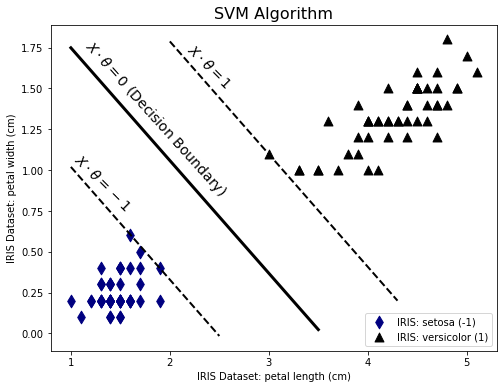

In [12]:
def decision_boundary(theta, x):
  return -(theta[1]/theta[2])*x - (theta[0]/theta[2])
def separating_line1(theta, x):
  return -(theta[1]/theta[2])*x + ((1-theta[0])/theta[2])
def separating_line2(theta, x):
  return -(theta[1]/theta[2])*x - ((1+theta[0])/theta[2])

fig = plt.figure(figsize=(8, 6))
colors = {0: 'navy', 1: 'black'}
markers = {0: 'd', 1: '^'}
labels =  {0: ' (-1)', 1: ' (1)'}
n_samples = len(iris.target)
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix,0], X[ix,1], c=colors[g],s=80, marker=markers[g], label="IRIS: " + iris.target_names[g] + labels[g])
x_dec = np.linspace(1, 3.5, 50)
x_sep1 = np.linspace(2.0, 4.3, 50)
x_sep2 = np.linspace(1, 2.5, 50)
y_dec = decision_boundary(svm1.theta, x_dec)
y_sep1 = separating_line1(svm1.theta, x_sep1)
y_sep2 = separating_line2(svm1.theta, x_sep2)
plt.plot(x_dec, y_dec, lw=3, color='k')
plt.plot(x_sep1, y_sep1, lw=2, color='k', ls='--')
plt.plot(x_sep2, y_sep2, lw=2, color='k', ls='--', )
plt.text(1.1, 0.85, r'$X \cdot \theta = 0$ (Decision Boundary)', color='k', fontsize=14, rotation=-48)
plt.text(2.15, 1.5, r'$X \cdot \theta = 1$', color='k', fontsize=14, rotation=-45)
plt.text(1.0, 0.75, r'$X \cdot \theta = -1$', color='k', fontsize=14, rotation=-45)
plt.xlabel("IRIS Dataset: " + iris.feature_names[2])
plt.ylabel("IRIS Dataset: " + iris.feature_names[3])
plt.title("SVM Algorithm", fontsize=16)
plt.legend(loc='lower right')
plt.savefig("svm_algorithm.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

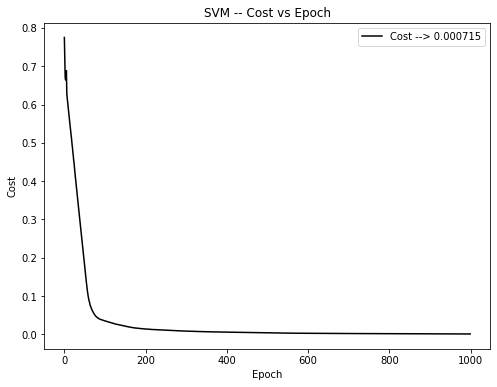

In [6]:
fig = plt.figure(figsize=(8,6))
plt.title(r'SVM -- Cost vs Epoch')

plt.plot(svm1.epoch_history, svm1.cost_history, color='k', label="Cost --> %f"%svm1.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("svm_cost_history.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

**Breast Cancer datasets**

30 features, 2 clusters

In [7]:
data = datasets.load_breast_cancer()
scaler = preprocessing.StandardScaler()
X2 = scaler.fit_transform(data.data)
X2_train, X2_test, y2_train, y2_test = \
model_selection.train_test_split(X2, 
                                 data.target, 
                                 train_size = .75, 
                                 random_state=0)

In [8]:
svm2 = SVM(X2_train, y2_train)
svm2.fit(epochs=1000, alpha=0.001)
y2_pred = svm2.predict(X2_test)

a2_score = metrics.accuracy_score(y2_test, y2_pred)
c2_matrix = metrics.confusion_matrix(y2_test, y2_pred)
c2_report = metrics.classification_report(y2_test, y2_pred)
print("Accuracy Score:\n", a2_score)
print("Confusion matrix:\n", c2_matrix)
print("Classification Report:\n", c2_report)

Accuracy Score:
 0.9790209790209791
Confusion matrix:
 [[51  2]
 [ 1 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



**Hand-witten Digits Dataset**

64 features 10 cluster, reduced to 64 features 2 clusters.

In [9]:
digits = datasets.load_digits()
X3 = digits.data
y3 = digits.target
idx = np.where(y3<2)
X3 = X3[idx]
y3 = y3[idx]
X3_train, X3_test, y3_train, y3_test = \
model_selection.train_test_split(X3, y3, 
                                 train_size = .75, 
                                 random_state=0)

In [10]:
svm3 = SVM(X3_train, y3_train)
svm3.fit(epochs=100, alpha=0.001)
y3_pred = svm3.predict(X3_test)

a3_score = metrics.accuracy_score(y3_test, y3_pred)
c3_matrix = metrics.confusion_matrix(y3_test, y3_pred)
c3_report = metrics.classification_report(y3_test, y3_pred)
print("Accuracy Score:\n", a3_score)
print("Confusion matrix:\n", c3_matrix)
print("Classification Report:\n", c3_report)

Accuracy Score:
 1.0
Confusion matrix:
 [[51  0]
 [ 0 39]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        39

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

